Reading Standard Workload File

In [1]:
FEATURES_NUMBER = 18
with open('test2.txt', 'r+', encoding='utf-8') as f:
    data = f.read().splitlines(True)
    
data = [ line.replace('\n', '').replace('\t', ' ').split() for line in data if not line.startswith(';')]
data = [[float(value) for value in line] for line in data if len(line) == FEATURES_NUMBER]
print(data[:10])
print(len(data))

[[1.0, 0.0, 3.0, 169.0, 1.0, 161.0, 1048576.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0], [2.0, 0.0, 7.0, 56212.0, 1.0, 49351.0, 1048576.0, -1.0, -1.0, -1.0, 1.0, 2.0, 1.0, 2.0, -1.0, -1.0, -1.0, -1.0], [3.0, 1.0, 43.0, 2.0, 1.0, -1.0, 16777216.0, -1.0, -1.0, -1.0, 1.0, 3.0, 1.0, 3.0, -1.0, -1.0, -1.0, -1.0], [4.0, 1.0, 1967.0, 116.0, 1.0, 41.0, 4194304.0, -1.0, -1.0, -1.0, 1.0, 4.0, 2.0, 4.0, -1.0, -1.0, -1.0, -1.0], [5.0, 3.0, 9.0, 0.0, 1.0, -1.0, 2097152.0, -1.0, -1.0, -1.0, 0.0, 5.0, 1.0, 5.0, -1.0, -1.0, -1.0, -1.0], [6.0, 3.0, 11.0, 3.0, 1.0, 2.0, 1048576.0, -1.0, -1.0, -1.0, 1.0, 6.0, 1.0, 6.0, -1.0, -1.0, -1.0, -1.0], [7.0, 3.0, 9.0, 22.0, 1.0, 2.0, 1048576.0, -1.0, -1.0, -1.0, 1.0, 6.0, 1.0, 6.0, -1.0, -1.0, -1.0, -1.0], [8.0, 3.0, 8.0, 191.0, 1.0, 184.0, 1048576.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0], [9.0, 4.0, 18.0, 3.0, 1.0, 2.0, 1048576.0, -1.0, -1.0, -1.0, 1.0, 6.0, 1.0, 6.0, -1.0, -1.0, -1.0, -1.0], [10.0, 4.0, 18.0, 11.0, 1

Converting it to pandas dataframe, removing not needed columns

In [2]:
import numpy as np
import pandas as pd

np_data = np.array(data, dtype=int)
print(np_data.shape)

labels = ['submit time', 'wait time', 'run time', 'cpu used', 'memory used','user id']
np_data = np.delete(np_data, [0, 4, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17], 1)
print(np_data.shape)
print(len(labels))
df = pd.DataFrame(np_data, columns=labels)
print(df.head())
train_data = df.iloc[1000:, :]

(13085792, 18)
(13085792, 6)
6
   submit time  wait time  run time  cpu used  memory used  user id
0            0          3       169       161      1048576        1
1            0          7     56212     49351      1048576        2
2            1         43         2        -1     16777216        3
3            1       1967       116        41      4194304        4
4            3          9         0        -1      2097152        5


In [119]:
train_data = train_data[train_data['cpu used'] > 0]
sample = train_data.sample(5)
print(sample)
sample['submit time'].min()

          submit time  wait time  run time  cpu used  memory used  user id
6720422       1348139         48     14256     14077      4194304      127
11625922      2313398         12      3082      2638       699050       53
11316557      2254876        427      2066      1974      2097152      234
1019749        207300          6      6367      5914      2097152       58
178907          40873         14       705       602      1048576      293


40873

In [26]:
train_data_with_count = train_data.copy()
train_data_with_count['count'] = train_data_with_count.groupby('user id')['user id'].transform('count')
train_data_with_count

,submit time,wait time,run time,cpu used,memory used,user id,count
1000,240,8,126,101,2097152,31,58188
1001,240,8,131,107,2097152,31,58188
1002,240,8,134,103,2097152,31,58188
1003,240,8,134,111,2097152,31,58188
1004,240,8,152,117,2097152,31,58188
...,...,...,...,...,...,...,...
13085737,2591952,7,27,19,1048576,850,3494
13085738,2591952,8,17,7,1048576,850,3494
13085739,2591952,8,19,9,1048576,850,3494
13085740,2591952,9,21,10,1048576,850,3494


Grouping by user id

In [77]:
grouped = train_data_with_count.groupby('user id').mean()
grouped.pop('wait time')
grouped.pop('submit time')
grouped.pop('run time')
grouped

,cpu used,memory used,count
user id,,,
1,209.233481,1.048576e+06,15376.0
2,31733.385857,1.053938e+06,45960.0
3,151.625109,1.676770e+07,12561.0
4,962.348475,2.560448e+06,9576.0
5,10605.845915,2.154856e+06,8359.0
...,...,...,...
1609,2.000000,8.388608e+06,2.0
1610,475.500000,4.194304e+06,14.0
1611,81.000000,1.258291e+07,2.0


Data preprocessing

In [78]:
from sklearn import preprocessing
user_profiles = grouped.to_numpy()
scaler = preprocessing.StandardScaler().fit(user_profiles)
user_profiles = scaler.transform(user_profiles)
user_profiles[:10]

array([[-0.21244552, -0.6944505 ,  0.38117008],
       [ 0.30499826, -0.69387438,  1.40775582],
       [-0.21339111,  0.99464943,  0.2866815 ],
       [-0.20008374, -0.53199212,  0.18648668],
       [-0.04179343, -0.57557511,  0.14563673],
       [-0.21405277, -0.68299489,  0.2027998 ],
       [-0.13050244, -0.65810087,  1.03953566],
       [-0.07788174, -0.61964312,  0.05262505],
       [ 1.86837299, -0.36679299, -0.08496241],
       [-0.1053516 , -0.37657893, 31.63926929]])

Visualizing data

In [79]:
import matplotlib.pyplot as plt
def plot_2d_scatter(X, y):
    fig, plot = plt.subplots()
    fig.set_size_inches(12, 12)
    plt.prism()
    
    for i in np.unique(y):
        cluster = (y == i)

        dim0 = X[cluster, 0]
        dim1 = X[cluster, 1]
        label = f"Cluster {i}"
        plot.scatter(dim0, dim1, label=label)
    
    plot.set_xticks(())
    plot.set_yticks(())

    plt.title("Workload logs")
    plt.tight_layout()
    plt.legend()
    plt.show()

In [80]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

def visualize_clustered_data(data):
    kmeans = KMeans(n_clusters=3).fit(data)
    tsne = TSNE(n_components=2, metric='euclidean', perplexity=500).fit_transform(data)
    plot_2d_scatter(tsne, kmeans.labels_)
    return kmeans.labels_

/Users/jakubmysliwiec/.asdf/installs/python/3.10.2/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/jakubmysliwiec/.asdf/installs/python/3.10.2/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


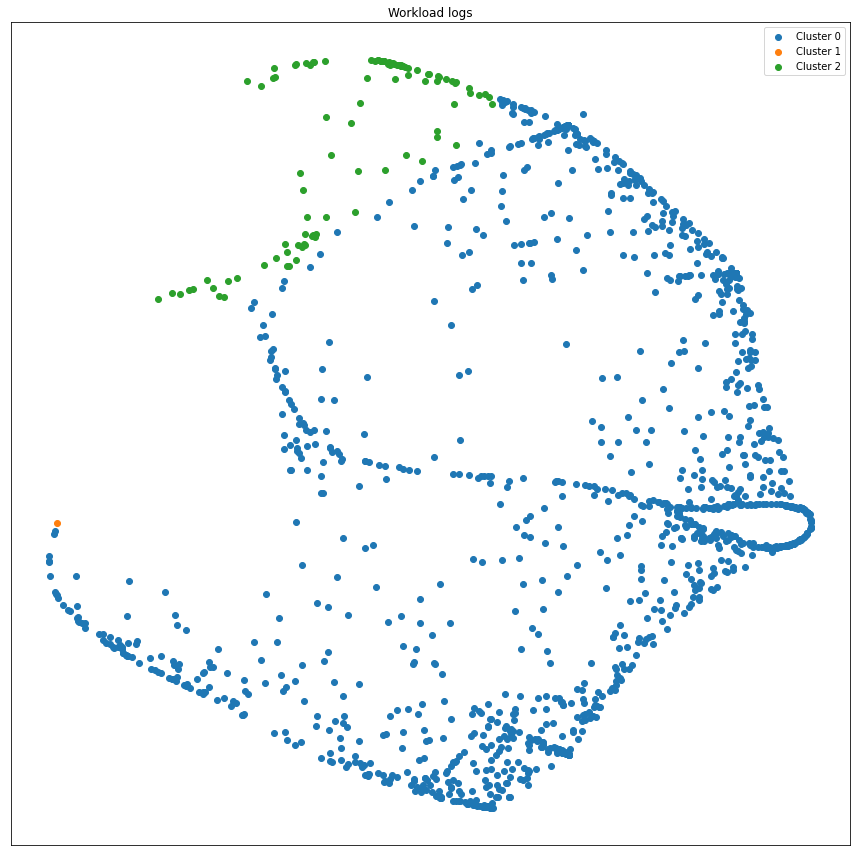

In [81]:
labels = visualize_clustered_data(user_profiles)

In [82]:
grouped[labels == 0]

,cpu used,memory used,count
user id,,,
1,209.233481,1.048576e+06,15376.0
2,31733.385857,1.053938e+06,45960.0
3,151.625109,1.676770e+07,12561.0
4,962.348475,2.560448e+06,9576.0
5,10605.845915,2.154856e+06,8359.0
...,...,...,...
1609,2.000000,8.388608e+06,2.0
1610,475.500000,4.194304e+06,14.0
1611,81.000000,1.258291e+07,2.0


In [83]:
grouped[labels == 1]

,cpu used,memory used,count
user id,,,
10,6733.700662,4.006757e+06,946616.0


In [84]:
grouped[labels == 2]

,cpu used,memory used,count
user id,,,
39,1196.030303,3.029220e+07,198.0
66,121413.747266,1.875715e+07,823.0
100,294206.283426,2.097152e+06,1436.0
108,38788.600000,1.901418e+07,15.0
120,122771.694143,2.224604e+07,1383.0
...,...,...,...
1511,42.000000,3.355443e+07,9.0
1512,7027.000000,6.710886e+07,2.0
1513,180.642857,2.636420e+07,14.0


## Gaussian Mixture

In [116]:
from sklearn.mixture import GaussianMixture

def visualize_mixtured_data(data):
    mixture = GaussianMixture(n_components=3).fit(data)
    predict = mixture.predict(data)
    tsne = TSNE(n_components=2, metric='euclidean', perplexity=500).fit_transform(data)
    plot_2d_scatter(tsne, predict)
    return predict

/Users/jakubmysliwiec/.asdf/installs/python/3.10.2/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/jakubmysliwiec/.asdf/installs/python/3.10.2/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


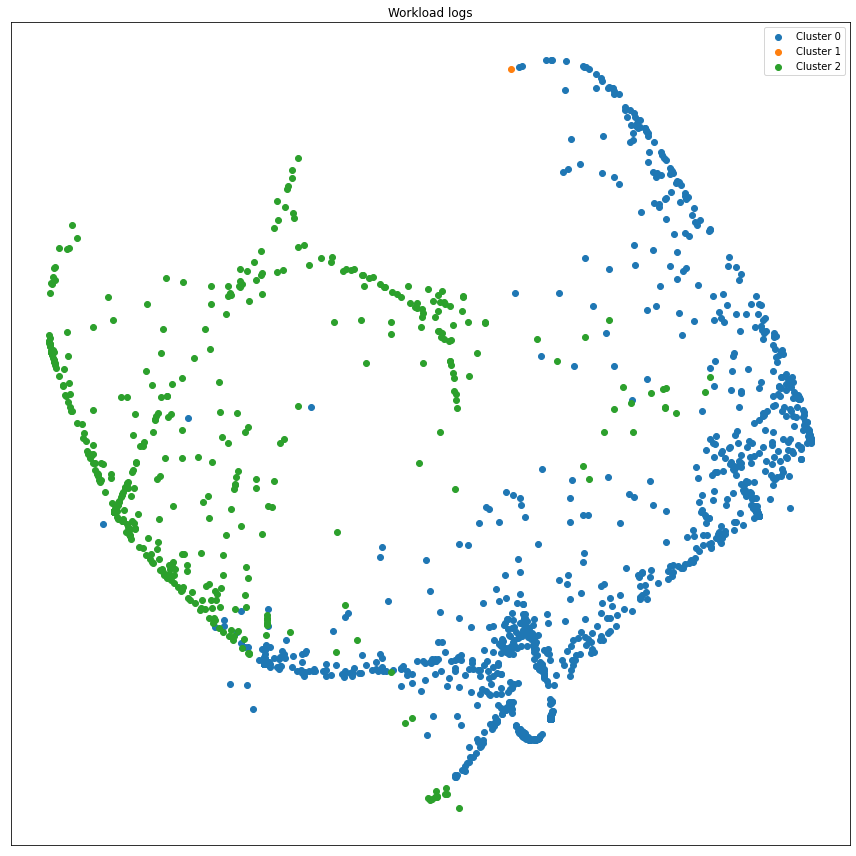

In [117]:
mixtures = visualize_mixtured_data(user_profiles)

In [102]:
grouped[mixtures == 0]

,cpu used,memory used,count
user id,,,
1,209.233481,1.048576e+06,15376.0
2,31733.385857,1.053938e+06,45960.0
3,151.625109,1.676770e+07,12561.0
4,962.348475,2.560448e+06,9576.0
5,10605.845915,2.154856e+06,8359.0
...,...,...,...
1607,203.571429,2.097152e+06,14.0
1609,2.000000,8.388608e+06,2.0
1610,475.500000,4.194304e+06,14.0


In [103]:
grouped[mixtures == 1]

,cpu used,memory used,count
user id,,,
9,126978.638012,4.097827e+06,1489.0
12,6391.207006,1.347787e+07,314.0
20,795.031949,1.228140e+07,626.0
28,1261.845539,2.047446e+07,751.0
39,1196.030303,3.029220e+07,198.0
...,...,...,...
1599,190.519258,9.175414e+06,701.0
1601,43122.000000,1.677722e+07,1.0
1603,60743.666667,3.355443e+07,3.0


In [104]:
grouped[mixtures == 2]

,cpu used,memory used,count
user id,,,
10,6733.700662,4.006757e+06,946616.0


In [109]:
grouped[mixtures == 0]['count'].mean()

4724.031984948259